     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


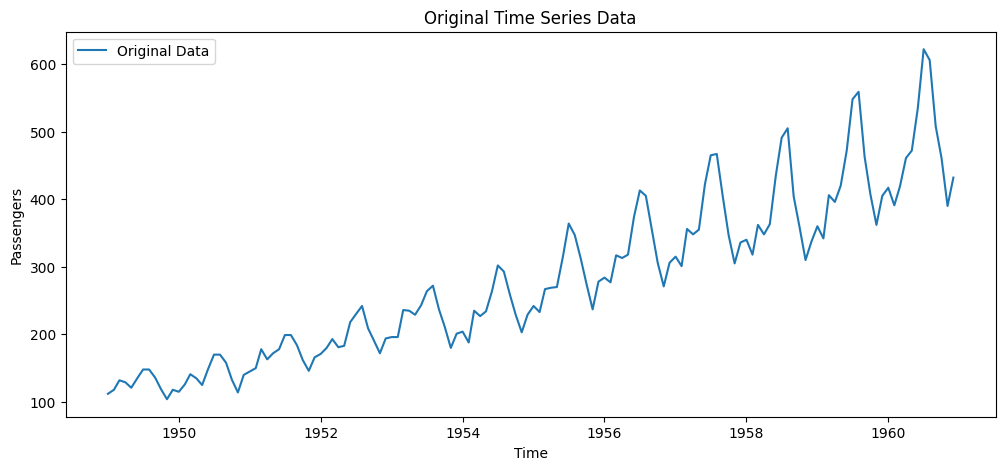

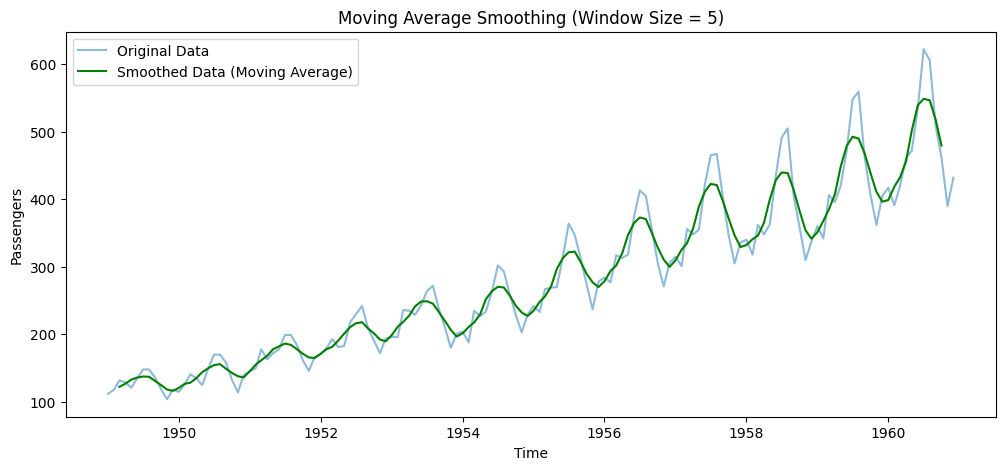

<ipython-input-2-ee110704295e>:45: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df.index[-1], periods=future_steps+1, freq='M')[1:]


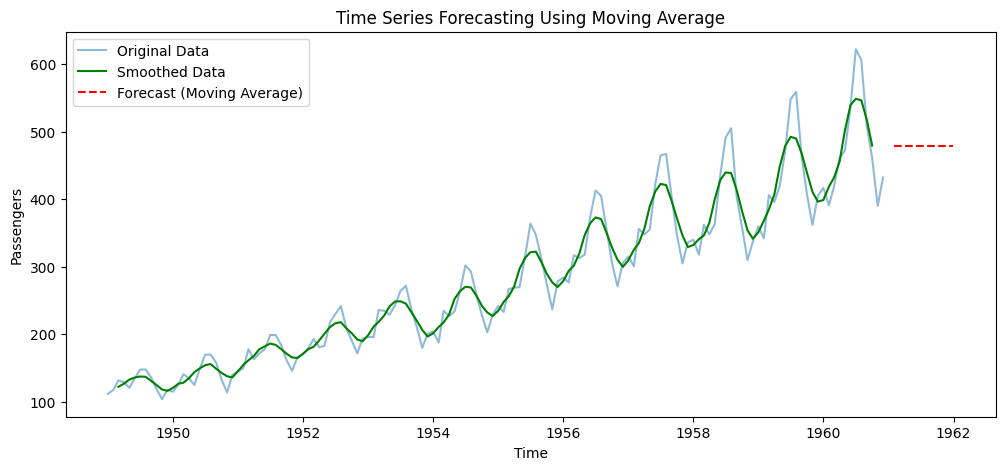

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/airline-passengers (1).csv"
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())

# Ensure 'Date' column is in datetime format
df.columns = ['Date', 'Passengers']  # Rename columns if necessary
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot original time series
plt.figure(figsize=(12,5))
plt.plot(df, label="Original Data")
plt.title("Original Time Series Data")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.show()

# --- Moving Average Smoothing for Data Preparation ---
window_size = 5  # Change this for different levels of smoothing
df['Smoothed'] = df['Passengers'].rolling(window=window_size, center=True).mean()

# Plot smoothed data
plt.figure(figsize=(12,5))
plt.plot(df['Passengers'], label="Original Data", alpha=0.5)
plt.plot(df['Smoothed'], label="Smoothed Data (Moving Average)", color='green')
plt.title(f"Moving Average Smoothing (Window Size = {window_size})")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.show()

# --- Time Series Forecasting Using Moving Average ---
# Predict the next 12 months using moving average
future_steps = 12
last_window = df['Passengers'].iloc[-window_size:].mean()
forecast = [last_window] * future_steps
future_dates = pd.date_range(start=df.index[-1], periods=future_steps+1, freq='M')[1:]

# Create forecast dataframe
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecast': forecast})
forecast_df.set_index('Date', inplace=True)

# Plot forecasted values
plt.figure(figsize=(12,5))
plt.plot(df['Passengers'], label="Original Data", alpha=0.5)
plt.plot(df['Smoothed'], label="Smoothed Data", color='green')
plt.plot(forecast_df, label="Forecast (Moving Average)", color='red', linestyle='dashed')
plt.title("Time Series Forecasting Using Moving Average")
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.legend()
plt.show()
